## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [6]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn  sklearn-pandas -q --user


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\paluv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [7]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,

)

#To build linear model for satistical analysis and prediction
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Loading the dataset

In [8]:
#uncomment and run the following line if using Google Collab
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
df = pd.read_csv('Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [10]:
pd = df.copy()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [11]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values in the data.

In [12]:
#Checking for duplicate values
df.duplicated().sum()

0

**Observation**:There is no duplicates in this data.

In [13]:
#library required to convert zipcode to county
!pip install usZipcode==1.0.1 sqlalchemy_mate==2.0.0.0
from uszipcode import SearchEngine
import pandas as pd


def Zipcode_to_county(Zipc):
    search = SearchEngine()
    Zipcode = search.by_zipcode(Zipc)  # Converting zipcode to zipcode object
    if Zipcode:  # Checking if Zipcode object exists
        return Zipcode.county
    else:
        return None  # Return None if zipcode is not found


#applying the user defined function and creating a new column 'County'
# Check if 'zip_code' column exists, if not, try variations or check your data
if 'zip_code' in df.columns:
    df['county'] = df['zip_code'].apply(Zipcode_to_county)
else:

    possible_column_names = ['zipcode', 'zip_code', 'ZIPCODE']
    for col_name in possible_column_names:
        if col_name in df.columns:
            print(f"Found column '{col_name}', using it instead of 'zip_code'")
            df['county'] = df[col_name].apply(Zipcode_to_county)
            break
    else:
        print("No suitable column found in the DataFrame.")





  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 660.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.1 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 1.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.1 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.1 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.1 MB 1.3 MB/s eta


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\paluv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\paluv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


No suitable column found in the DataFrame.


In [14]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Observation**: There are 467 unique values in Zipcode decreased to 38 unique values in county.

In [15]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
df.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [17]:
UDI=df.columns
for i in UDI:
    print(i)





ID
Age
Experience
Income
ZIPCode
Family
CCAvg
Education
Mortgage
Personal_Loan
Securities_Account
CD_Account
Online
CreditCard


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


There is no more negative values in the experience columns in the dataset.

In [19]:
#convert all the columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'age', 'experience', 'income', 'zipcode', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [20]:
# Printing top 5 unique values in each column
for i in df.columns:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts().head(5))
    print("\n")
    print("-" * 40)


Unique values in id are :
id
1       1
3331    1
3338    1
3337    1
3336    1
Name: count, dtype: int64


----------------------------------------

Unique values in age are :
age
35    151
43    149
52    145
54    143
58    143
Name: count, dtype: int64


----------------------------------------

Unique values in experience are :
experience
32    154
20    148
9     147
5     146
23    144
Name: count, dtype: int64


----------------------------------------

Unique values in income are :
income
44    85
38    84
81    83
41    82
39    81
Name: count, dtype: int64


----------------------------------------

Unique values in zipcode are :
zipcode
94720    169
94305    127
95616    116
90095     71
93106     57
Name: count, dtype: int64


----------------------------------------

Unique values in family are :
family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


----------------------------------------

Unique values in ccavg are :
ccavg
0.3    241
1.0    231
0.2 

**Observation**:
1.   0's out number 1 in Mortgage,personal loan,securities account,CD account and credit card columns.

2.   Large number of observations for Los Angeles county is 1095.





In [21]:
 #Printing bottom 5 unique values in each column
for i in df.columns:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts().tail(5))
    print("\n")
    print("-" * 40)



Unique values in id are :
id
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, dtype: int64


----------------------------------------

Unique values in age are :
age
25    53
24    28
66    24
67    12
23    12
Name: count, dtype: int64


----------------------------------------

Unique values in experience are :
experience
-1     33
-2     15
 42     8
-3      4
 43     3
Name: count, dtype: int64


----------------------------------------

Unique values in income are :
income
202    2
203    2
189    2
224    1
218    1
Name: count, dtype: int64


----------------------------------------

Unique values in zipcode are :
zipcode
96145    1
94087    1
91024    1
93077    1
94598    1
Name: count, dtype: int64


----------------------------------------

Unique values in family are :
family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


----------------------------------------

Unique values in ccavg are :
ccavg
3.25    1
3.67    1
4.67    1
8.90    1
2

**Observation**

1.  There are negative values in 'Experience' that needs to be fixed




In [22]:
df.shape

(5000, 14)

The dataset has 5000 rows and 14 columns.

In [23]:
# library required to convert zipcode to county

from uszipcode import SearchEngine

# User defined function to do the same


def zipcode_to_county(zipc):
    search = SearchEngine()
    zipcode = search.by_zipcode(zipc)
    return zipcode.county

In [24]:
from uszipcode import SearchEngine

# User defined function to do the same


def zipcode_to_county(zipc):
    search = SearchEngine()
    zipcode = search.by_zipcode(zipc)
    # Check if zipcode object is not None before accessing county
    if zipcode:
        return zipcode.county
    else:
        return None  # or any other default value like "Unknown"

# Applying the user defined function and creating a new column 'County'
df["County"] = df["zipcode"].apply(zipcode_to_county)

Download C:\Users\paluv\.uszipcode\simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [25]:
df.head(10)

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,County
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego County
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Los Angeles County
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey County
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles County
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Ventura County


In [26]:
df.describe(include="all")

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,County
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4966
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,NaN
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,NaN
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,NaN
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN


**Observation**:

1.   The average age of the applicants is ~45 years.
2.   The average income of applicants with 20 years of experience is 73k annually.
3. There are 5000 observations present in total.
4. The minimum and maximum values indicate a widely spread in age,experience,income,mortgage.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
 14  County              4966 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

There are 1 float) and 13 integers in the data.
The CC Avg data is encoded as numerical and rest of them are integers.memory used is 547.0 KB

In [28]:
df[df['experience'] < 0].value_counts().sum( )


51

In [29]:
df[df["experience"] < 0].sort_values(by=["experience"], ascending=True)

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,County
4514,4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2618,2619,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4285,4286,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3626,3627,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2876,2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3130,3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2466,2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3796,3797,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,Los Angeles County


**Observation**:
1.    Total of 51 rows with negative experience.
If we consider the corresponding age,income,and education,there doesn't seem to be any pattern,but have some negative values in experience could most probably be a data entry error.

2.   Hence, we need to convert these values to absolute values insead of treating them as missing values.



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [30]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [31]:
# defined function to convert negative values to absolute values
def convert_negative_to_absolute(value):
    if value < 0:
        return abs(value)
    else:
        return value
df["experience"] = df["experience"].abs()

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
df['experience'] = df['experience'].apply(convert_negative_to_absolute)
df['experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

**Observation**: No more negative vaues in experience.

In [34]:
#convert categorical data to numerical data
numerical_features = ['age', 'experience', 'income', 'ccavg', 'mortgage']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [35]:
df[df["experience"] < 0]["education"].value_counts()


Series([], Name: count, dtype: int64)

In [36]:
df[df["experience"] < 0]["education"].value_counts()

Series([], Name: count, dtype: int64)

In [37]:
df[df["experience"] < 0]["family"].value_counts()

Series([], Name: count, dtype: int64)

In [38]:
df[df["income"] < 0]["family"].value_counts()

Series([], Name: count, dtype: int64)

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [40]:
## function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [41]:
print(df.columns)

Index(['id', 'age', 'experience', 'income', 'zipcode', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard', 'County'],
      dtype='object')


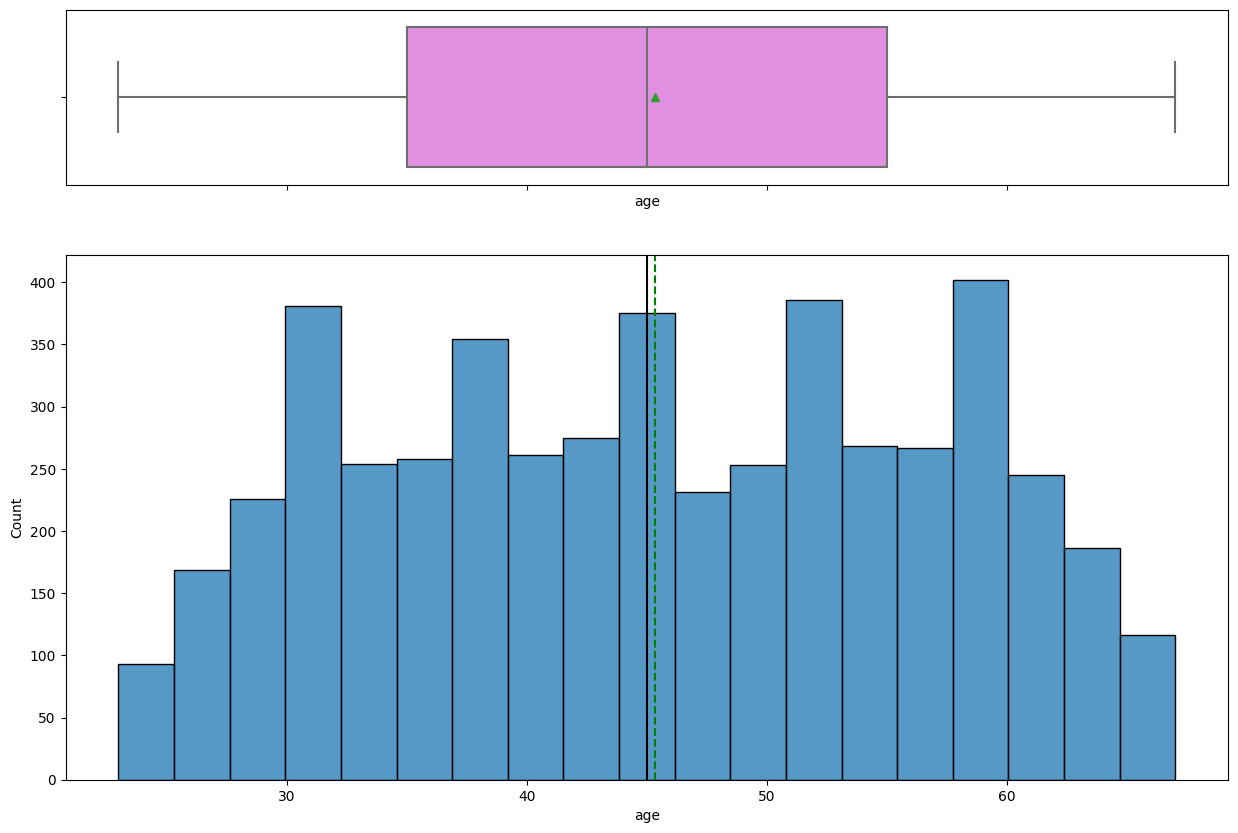

In [42]:
histogram_boxplot(df, 'age')


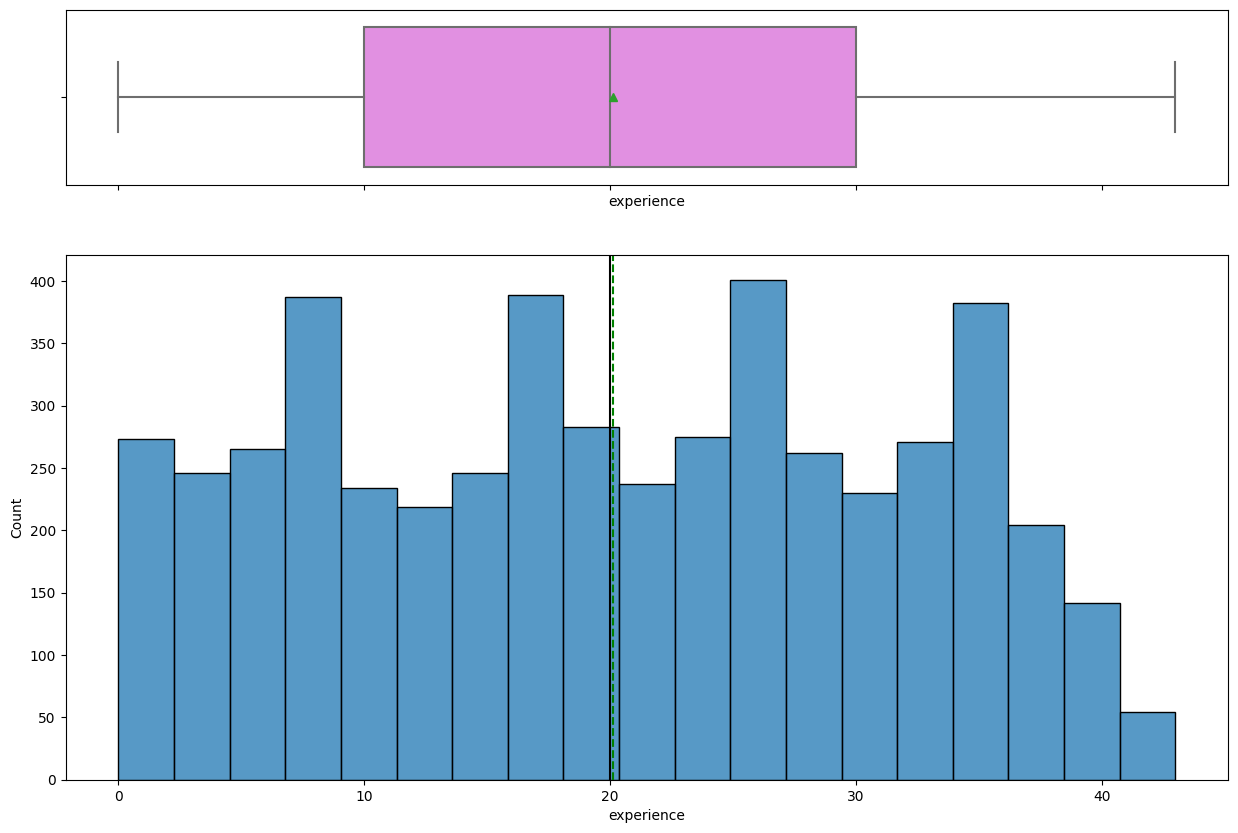

In [43]:
histogram_boxplot(df, 'experience')


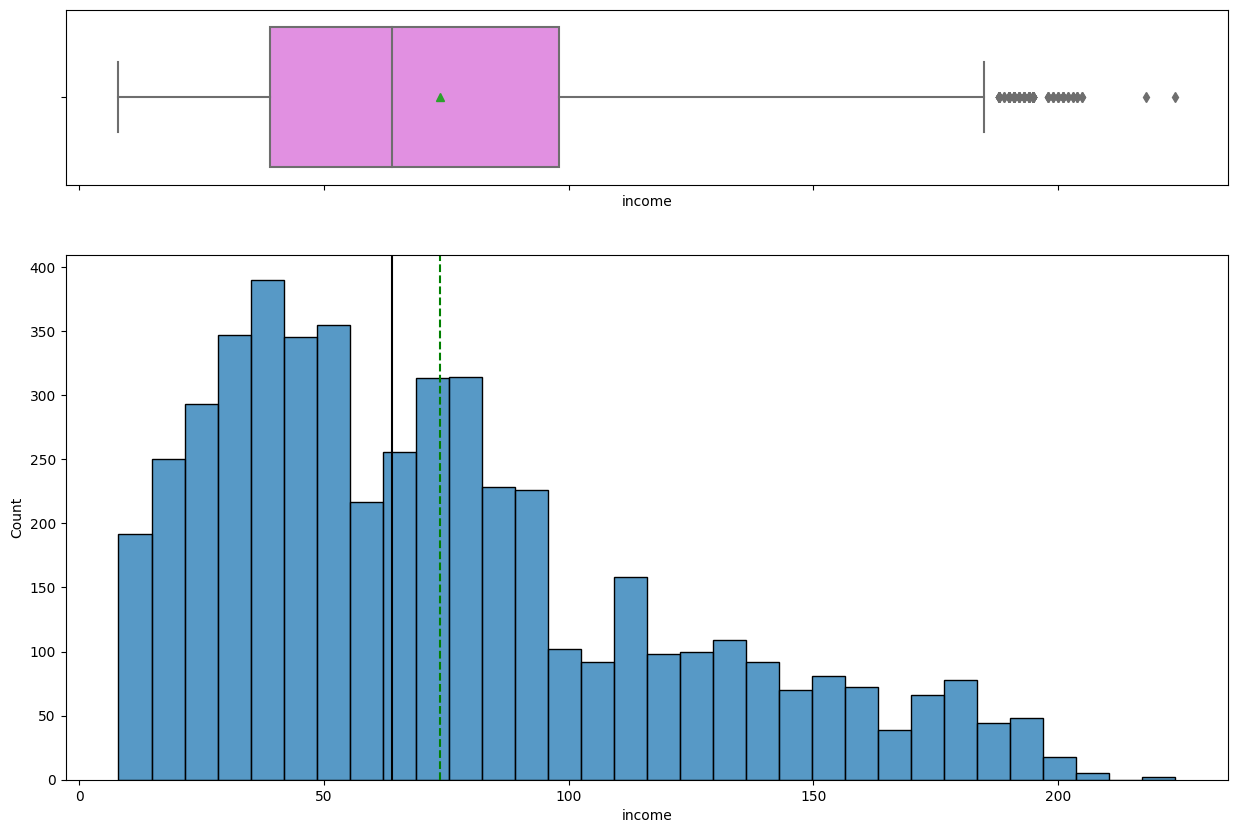

In [44]:
histogram_boxplot(df, 'income')

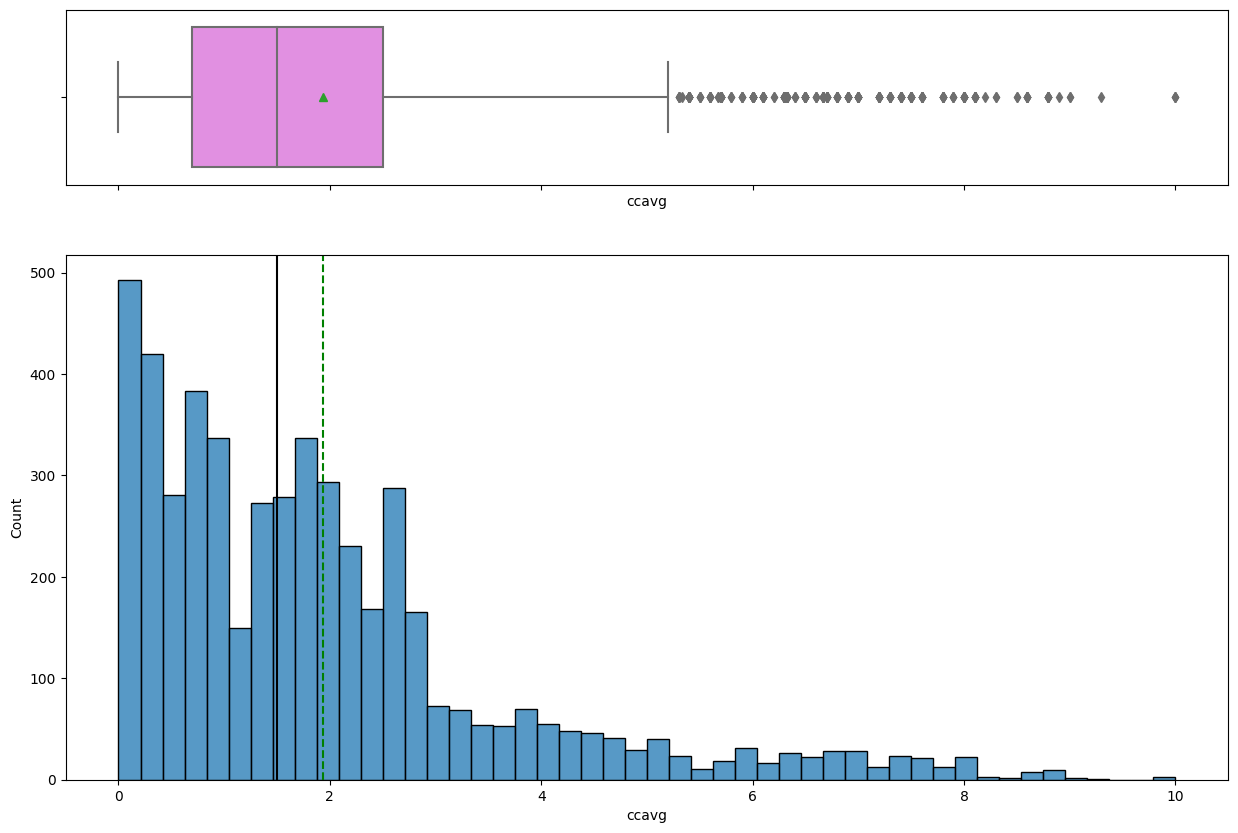

In [45]:
histogram_boxplot(df, 'ccavg')


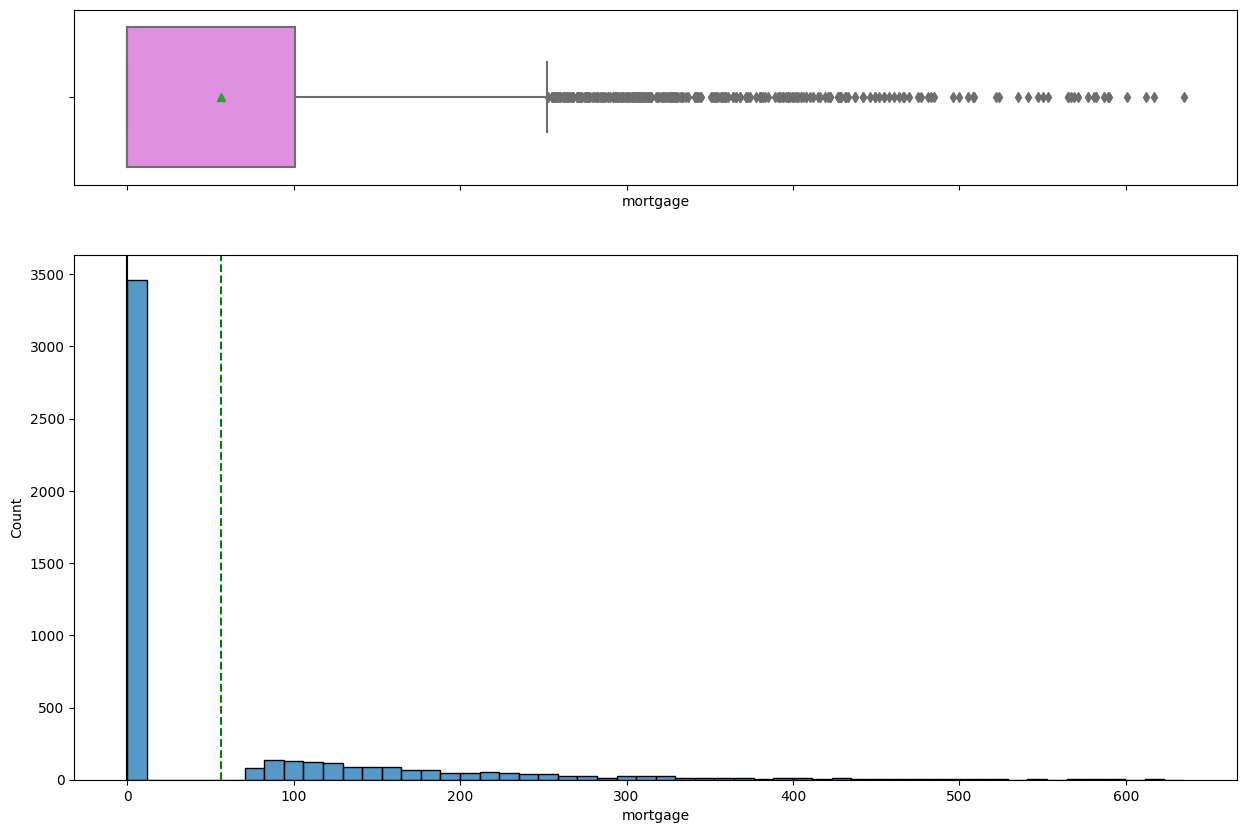

In [46]:
histogram_boxplot(df, 'mortgage')


**Observation**
 The right skewed disribution are  income, cc_avg, and mortgage.

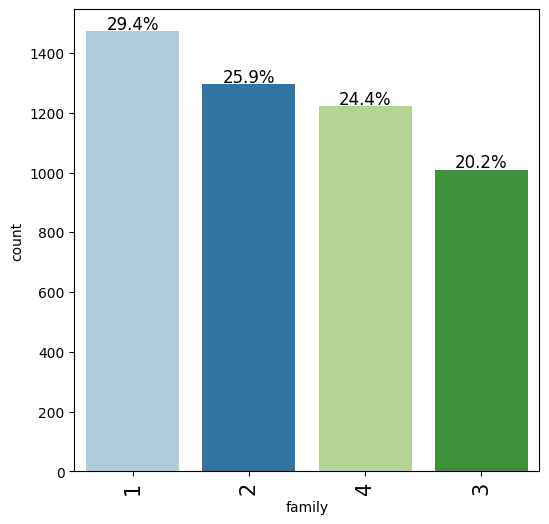

In [47]:
labeled_barplot(df, 'family', perc=True)

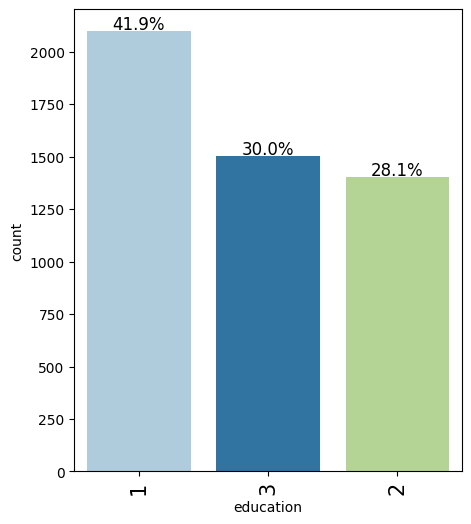

In [48]:
labeled_barplot(df, 'education', perc=True)

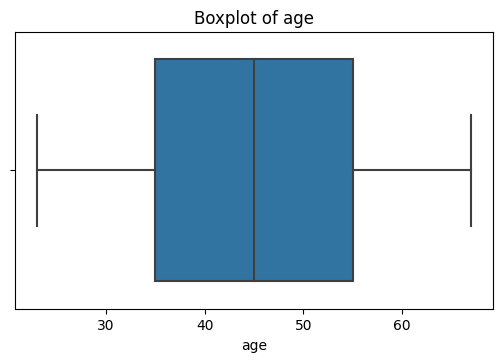

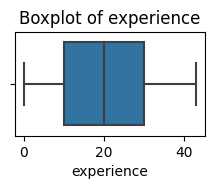

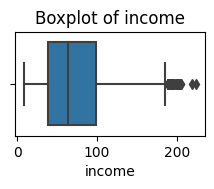

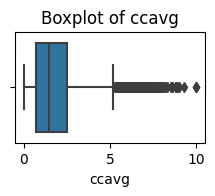

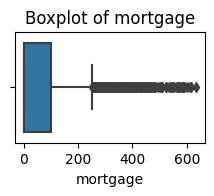

In [49]:
# outlier detection using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
#convert categorical data into numerical data
numerical_features = ['age', 'experience', 'income', 'ccavg', 'mortgage']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    # Check if the feature exists in the DataFrame before plotting
    if feature in df.columns:
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.tight_layout()
        plt.show()
    else:

      print(f"Feature '{feature}' not found in the DataFrame.")


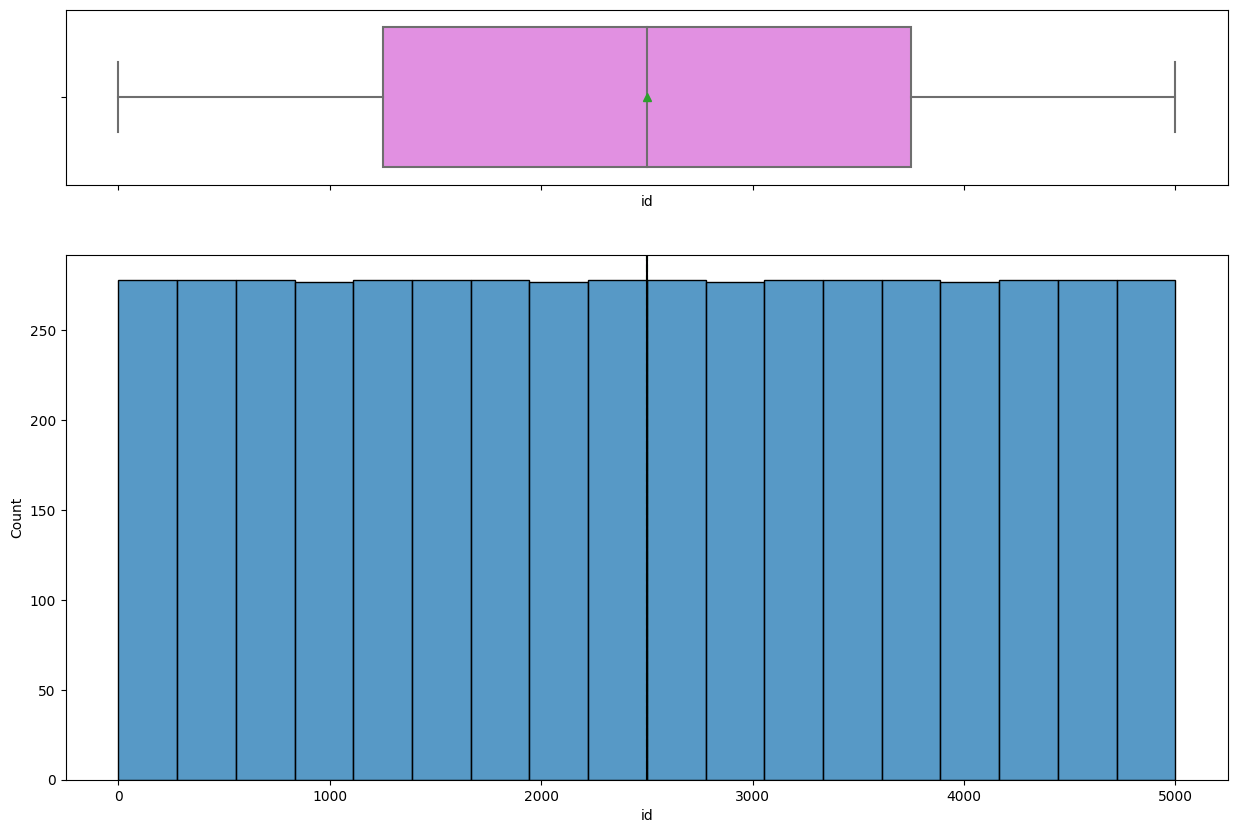

<Figure size 1200x700 with 0 Axes>

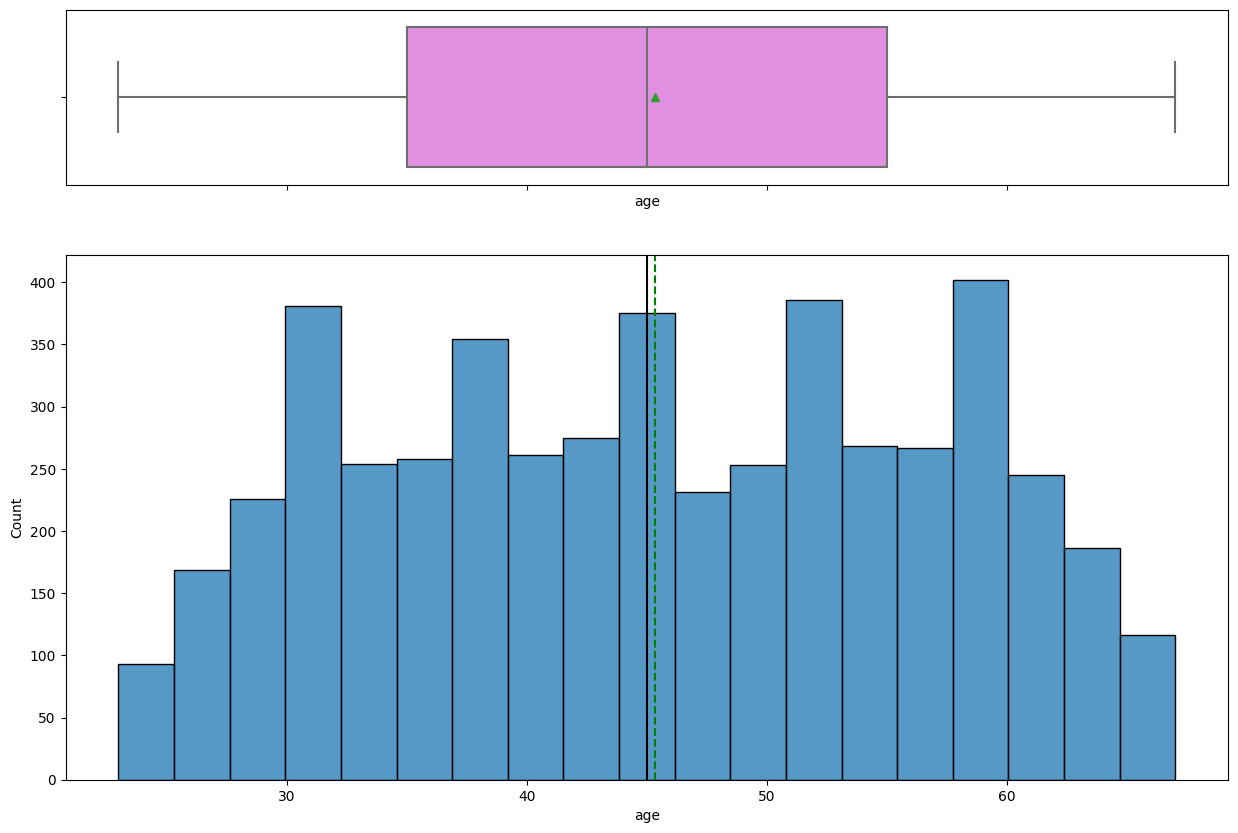

<Figure size 1200x700 with 0 Axes>

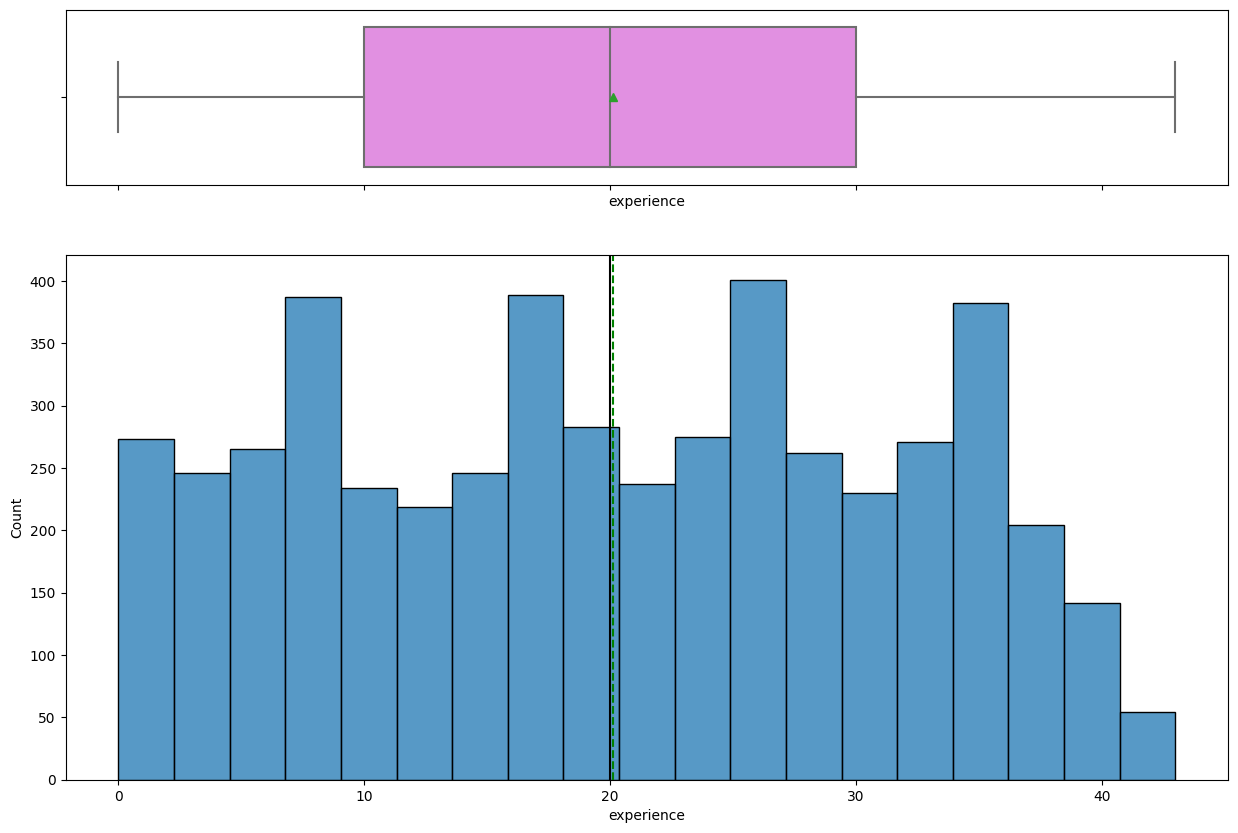

<Figure size 1200x700 with 0 Axes>

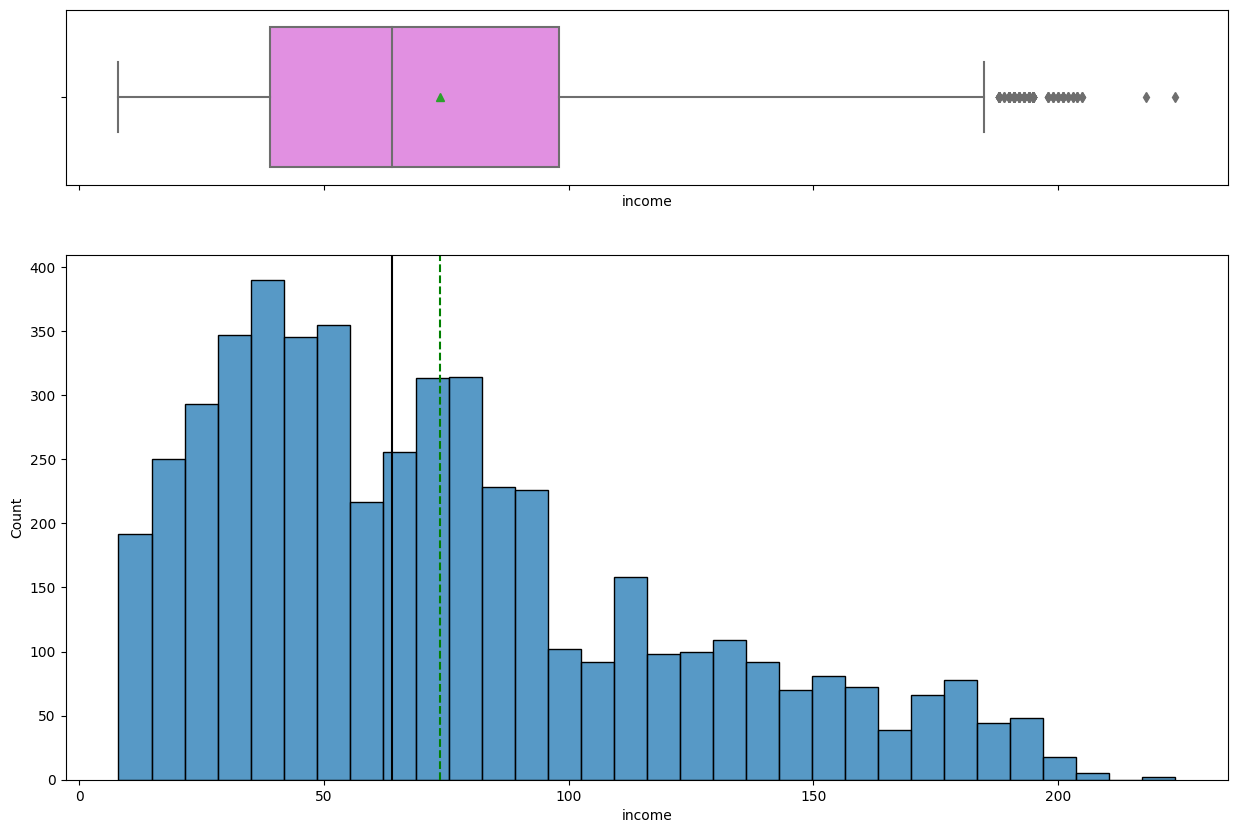

<Figure size 1200x700 with 0 Axes>

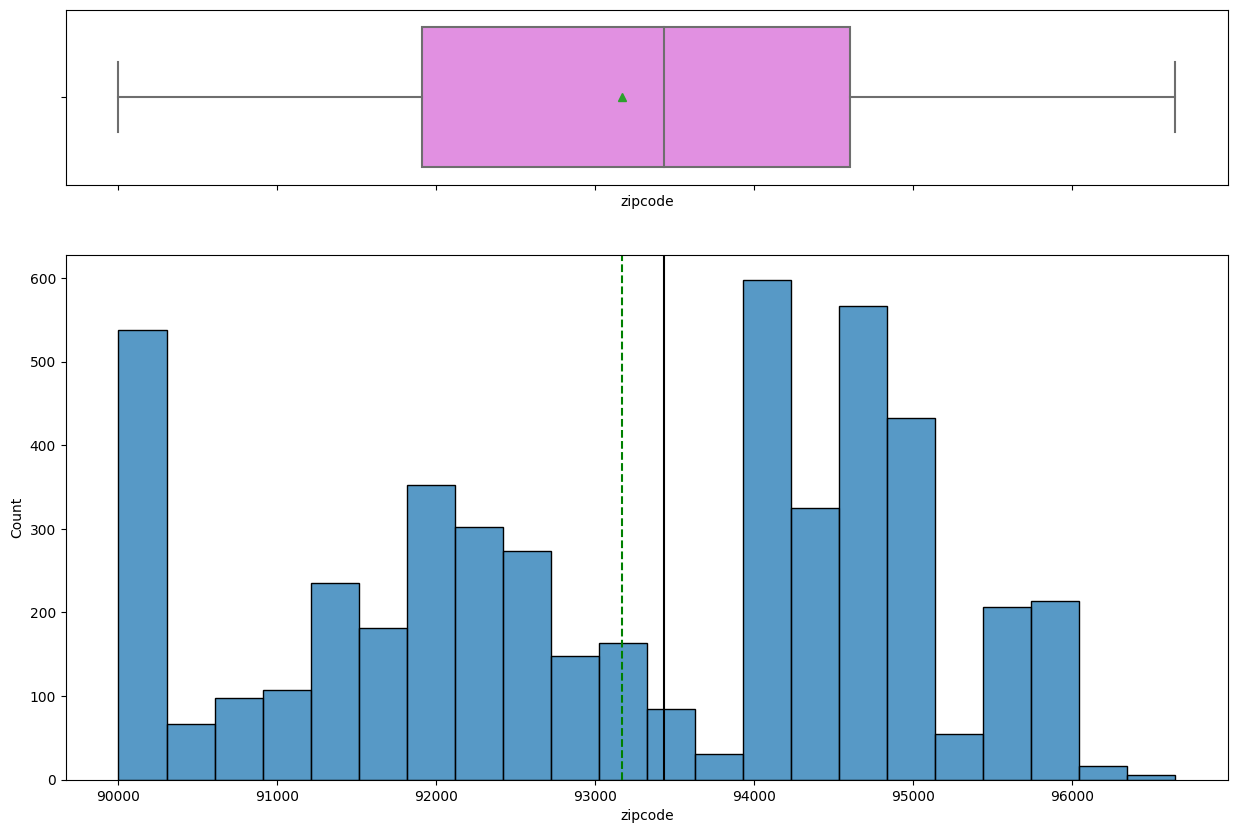

<Figure size 1200x700 with 0 Axes>

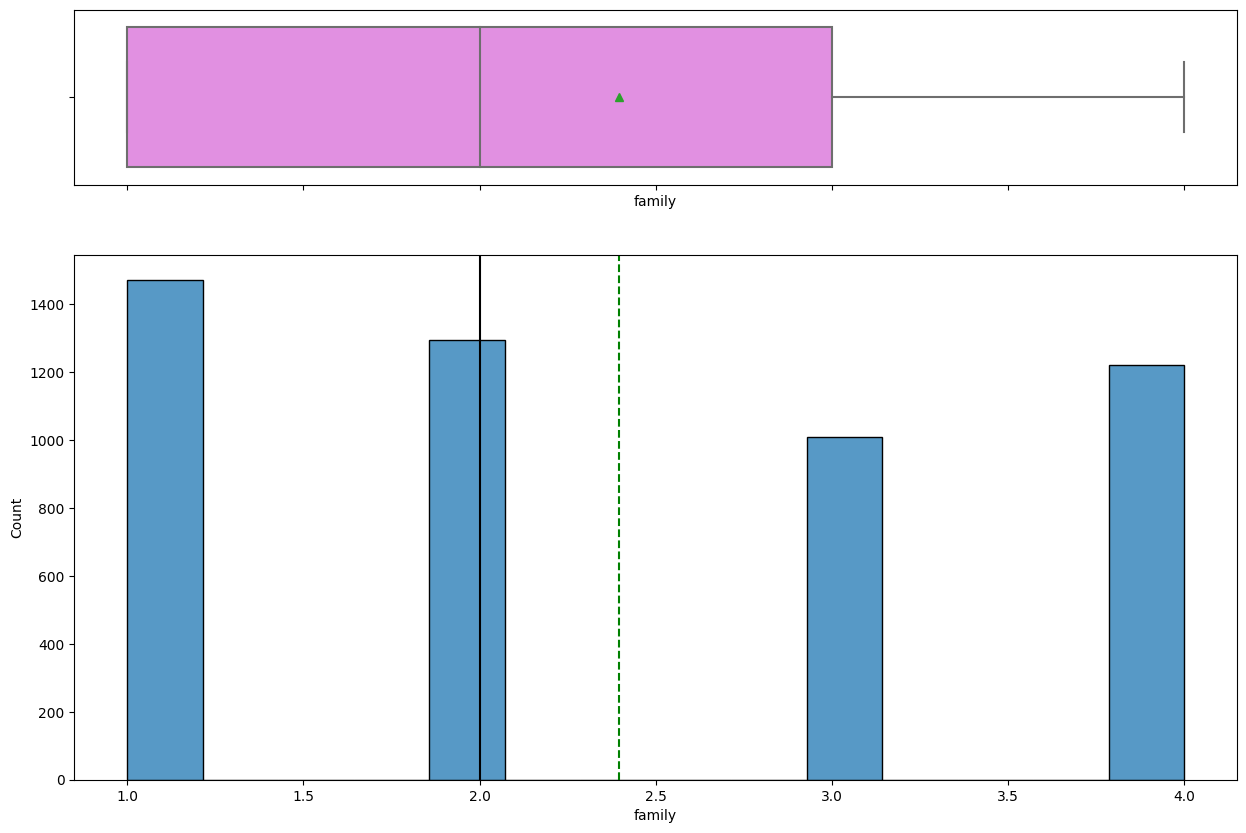

<Figure size 1200x700 with 0 Axes>

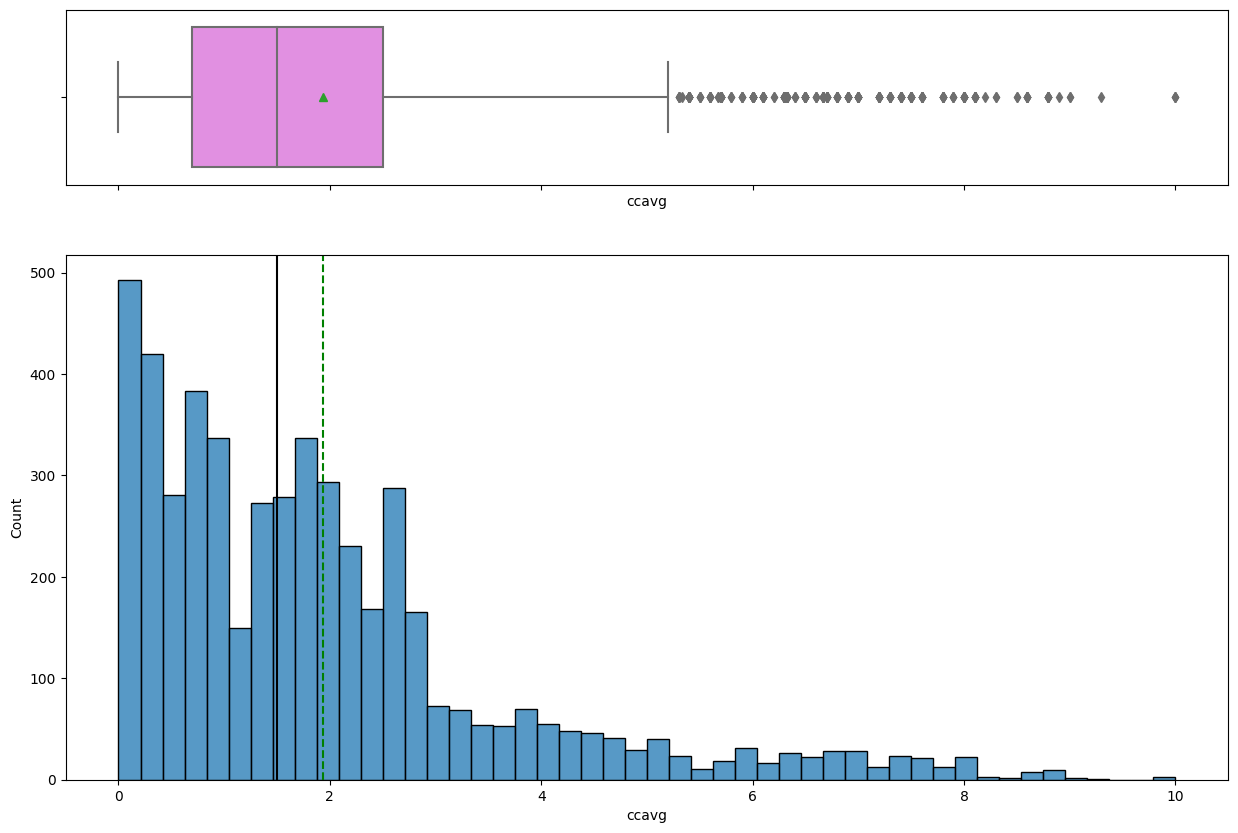

<Figure size 1200x700 with 0 Axes>

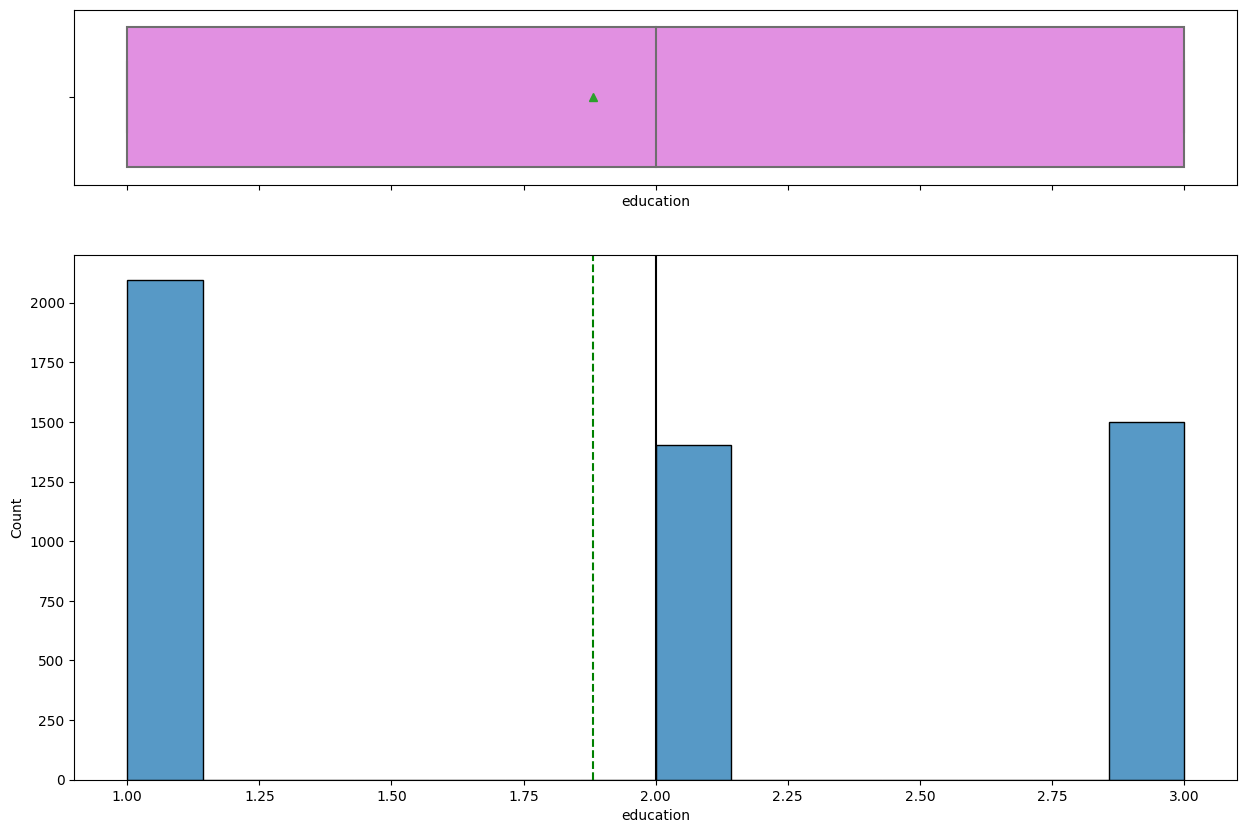

<Figure size 1200x700 with 0 Axes>

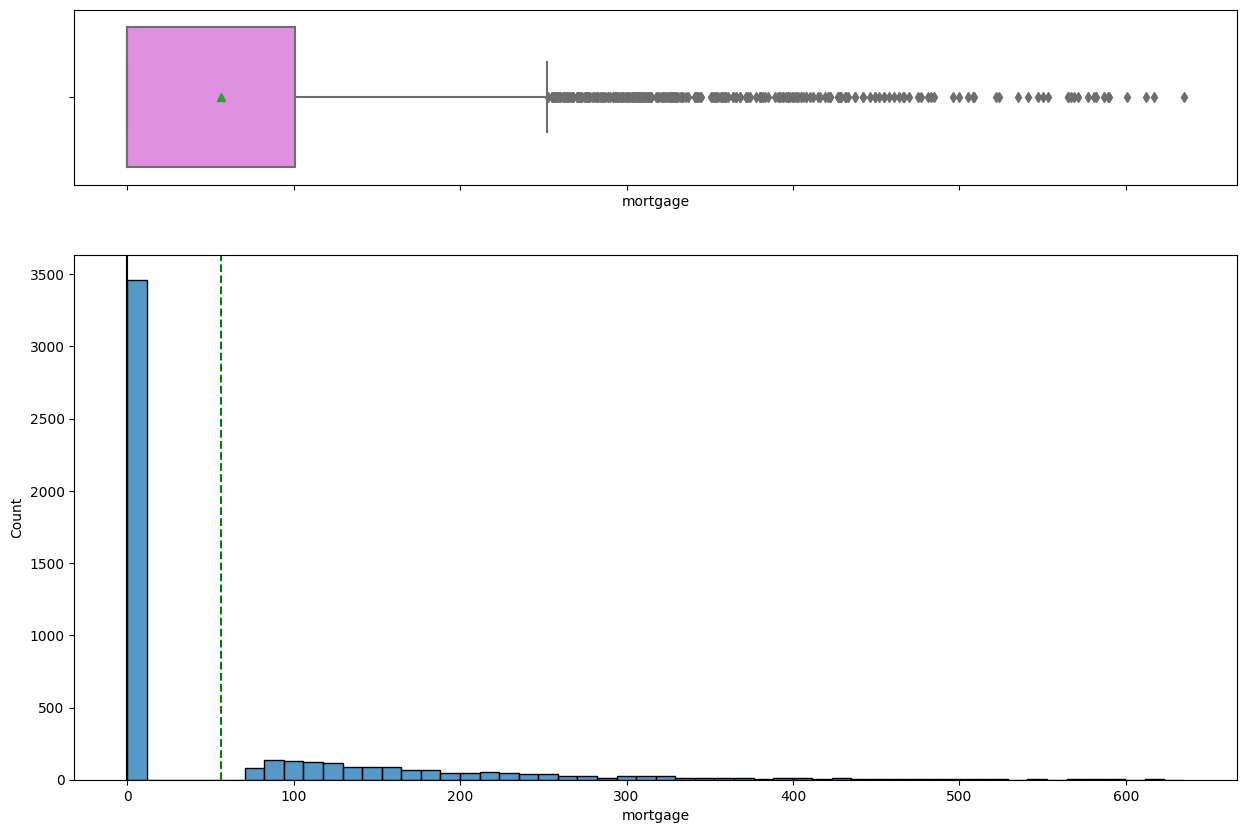

<Figure size 1200x700 with 0 Axes>

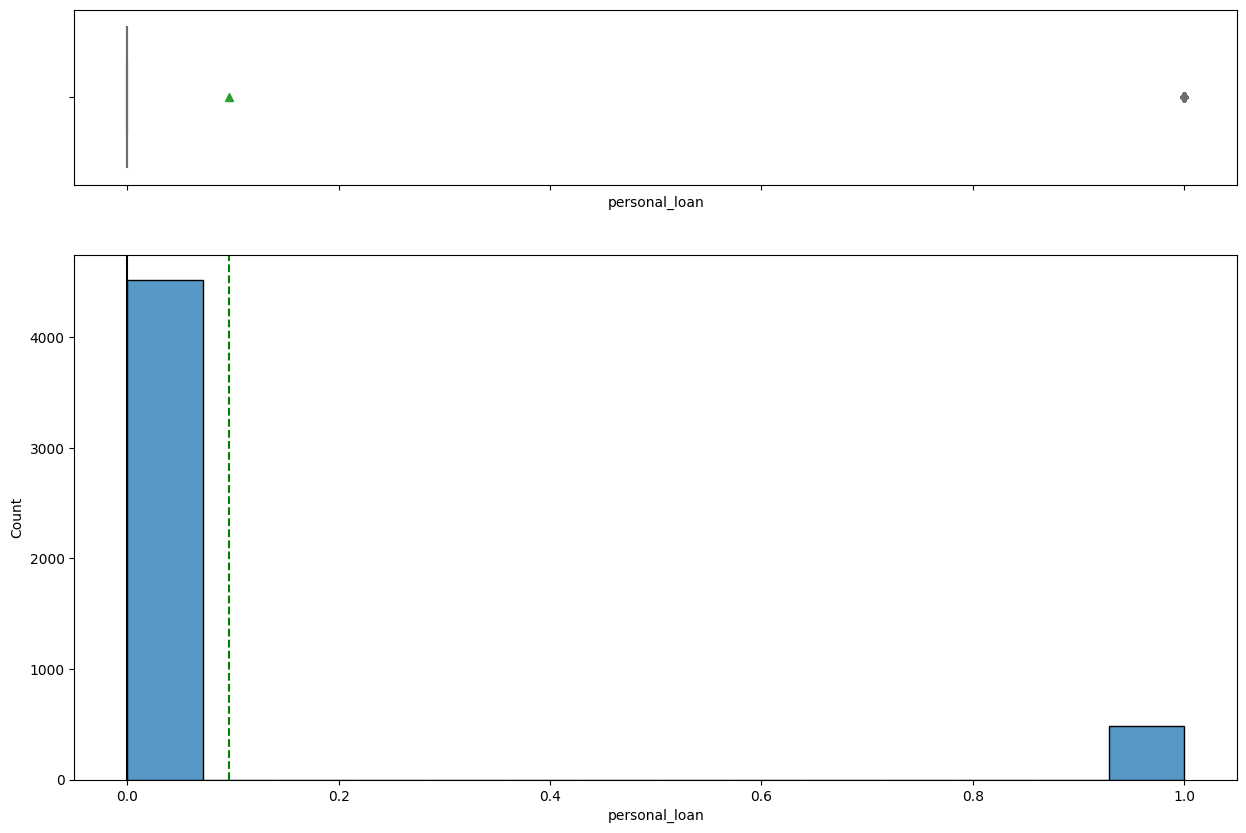

<Figure size 1200x700 with 0 Axes>

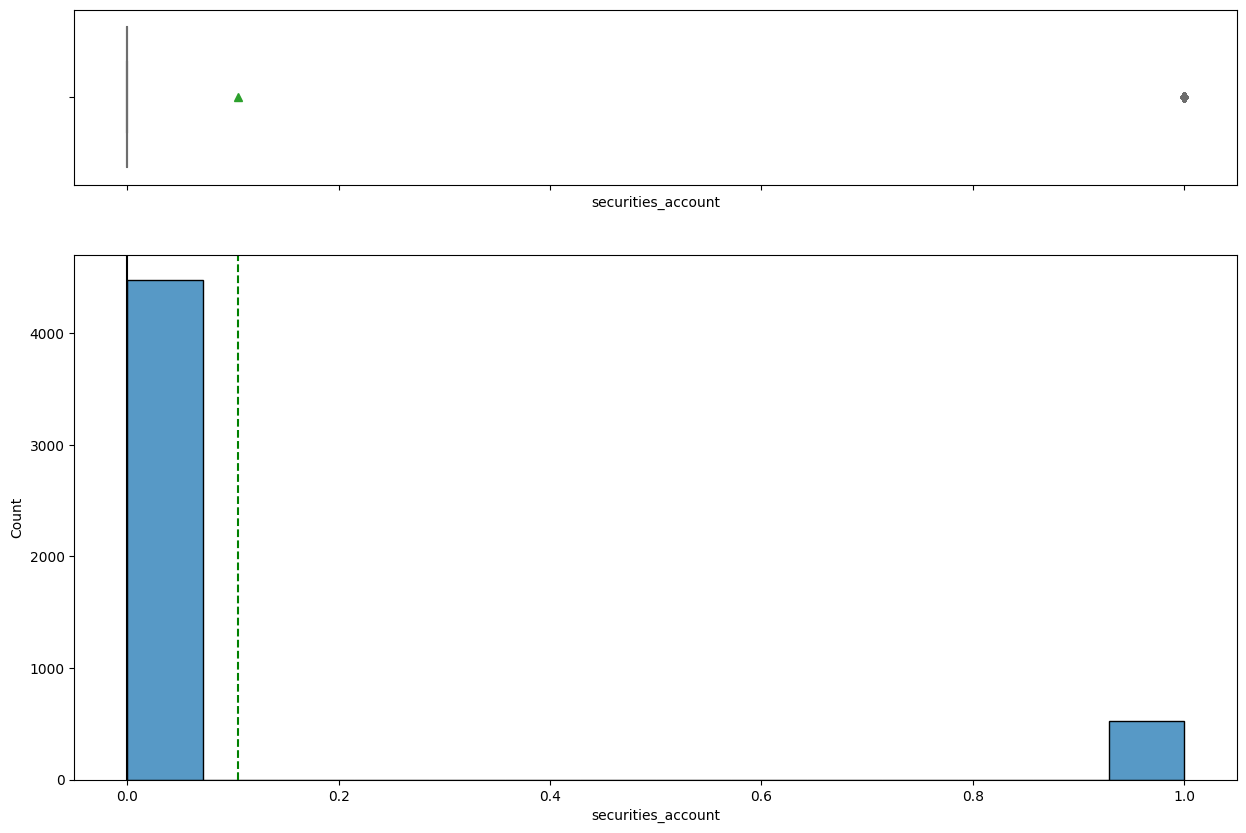

<Figure size 1200x700 with 0 Axes>

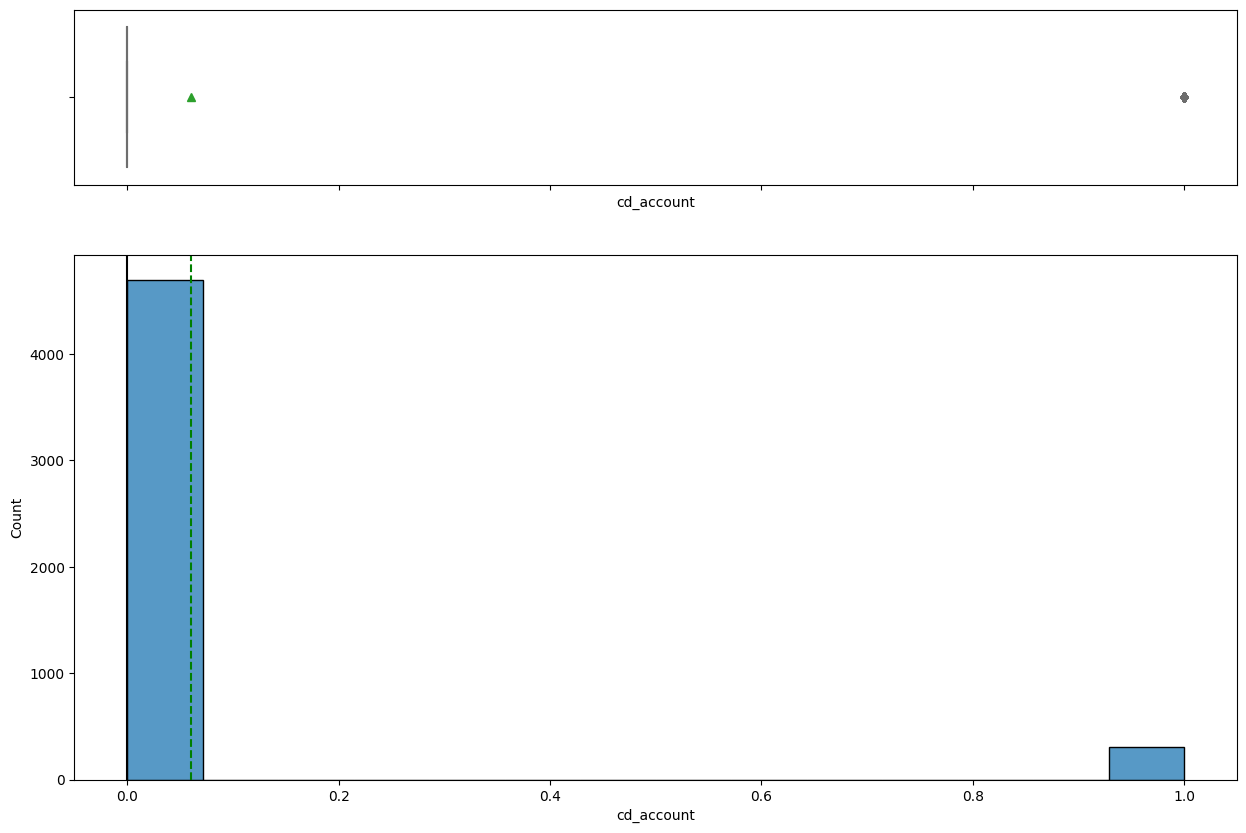

<Figure size 1200x700 with 0 Axes>

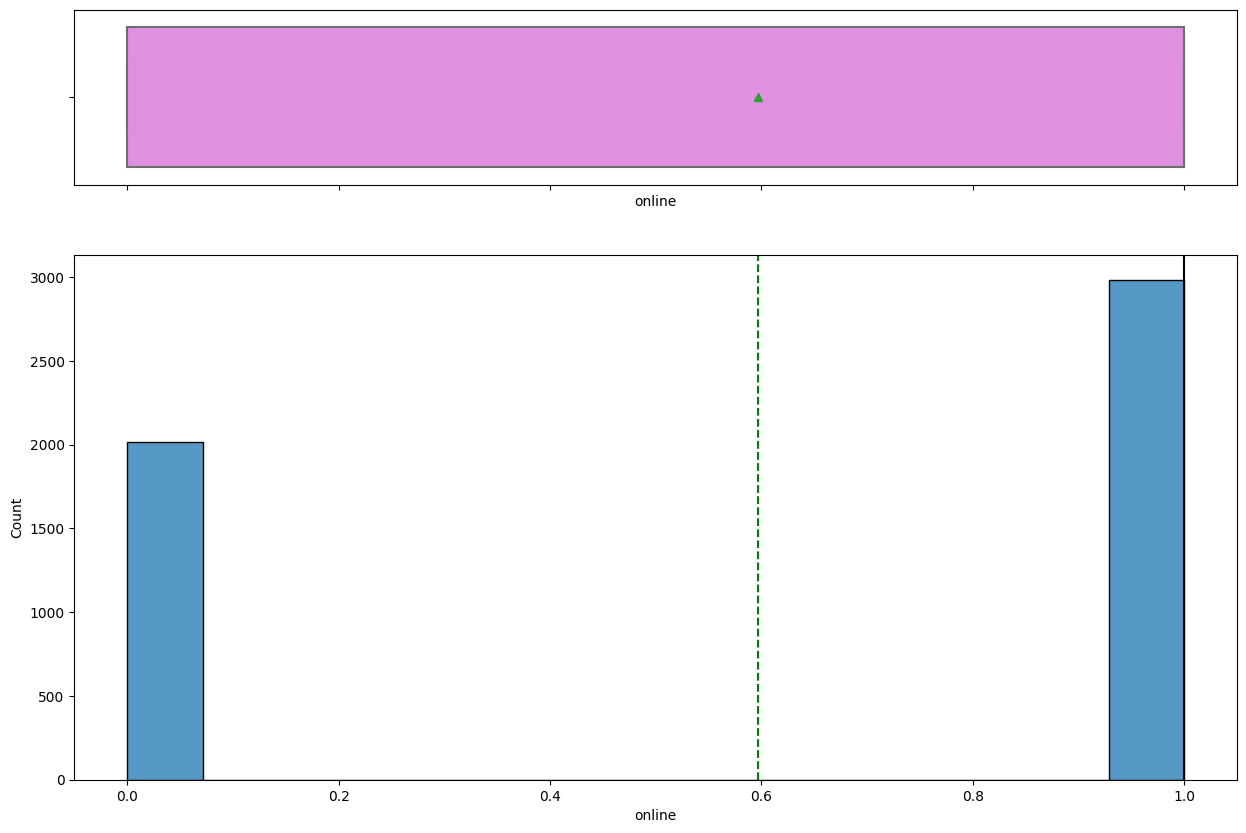

<Figure size 1200x700 with 0 Axes>

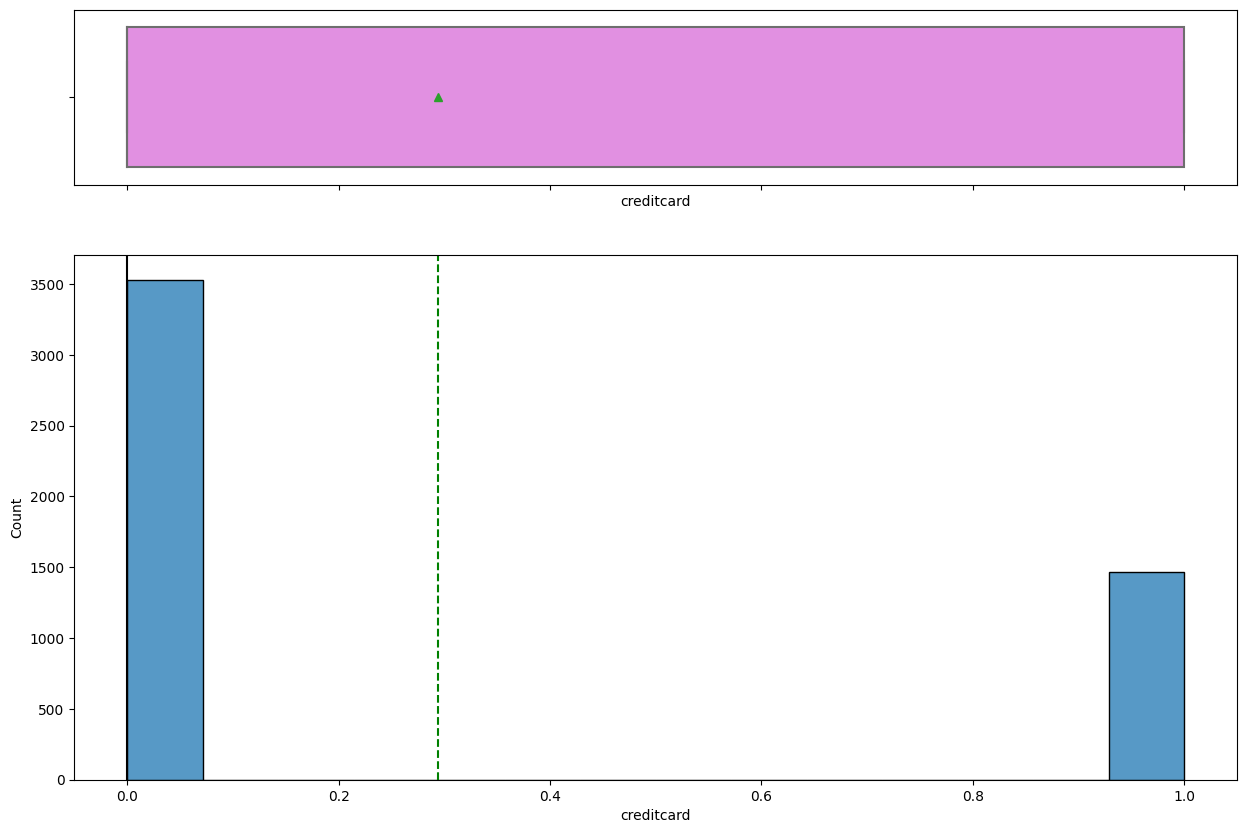

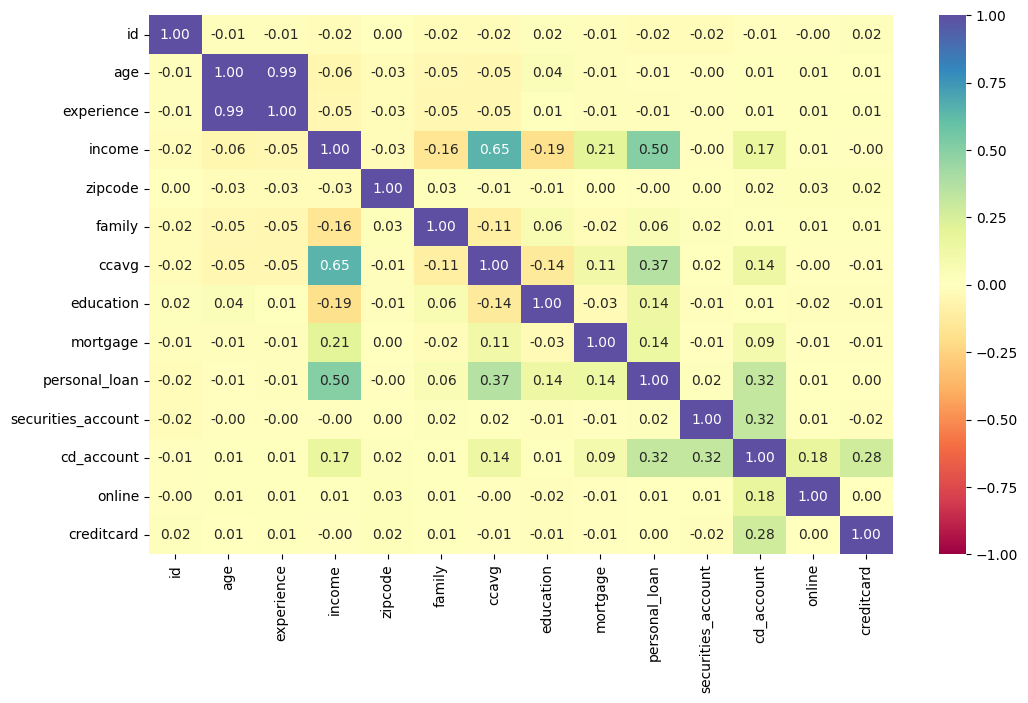

In [50]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
for col in cols_list:
    histogram_boxplot(df, col)
    plt.show()

    plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


personal_loan     0    1   All
education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


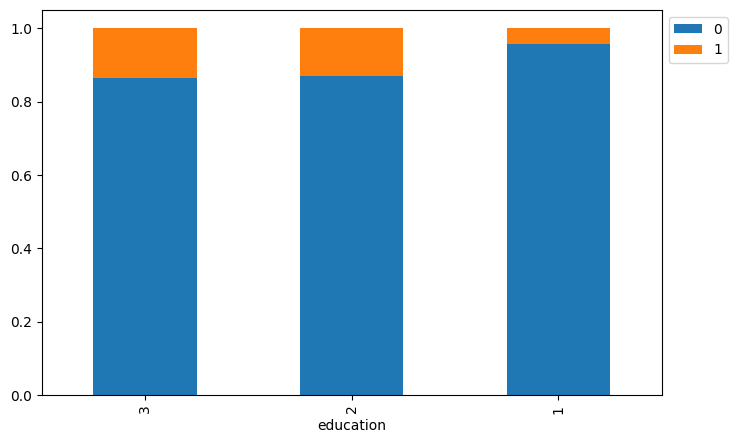

In [51]:
stacked_barplot(df, "education", "personal_loan")

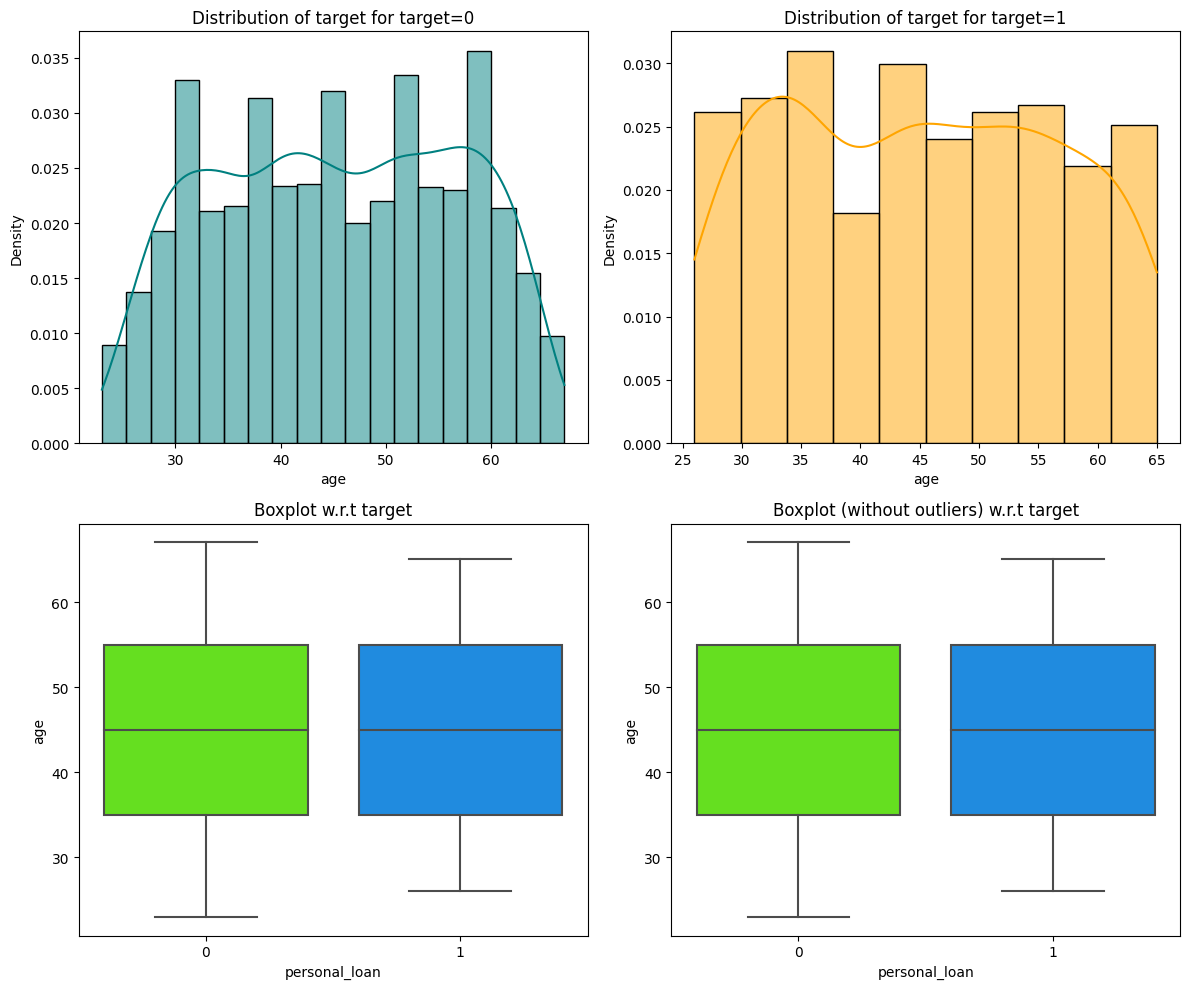

In [52]:
distribution_plot_wrt_target(df, "age", "personal_loan")

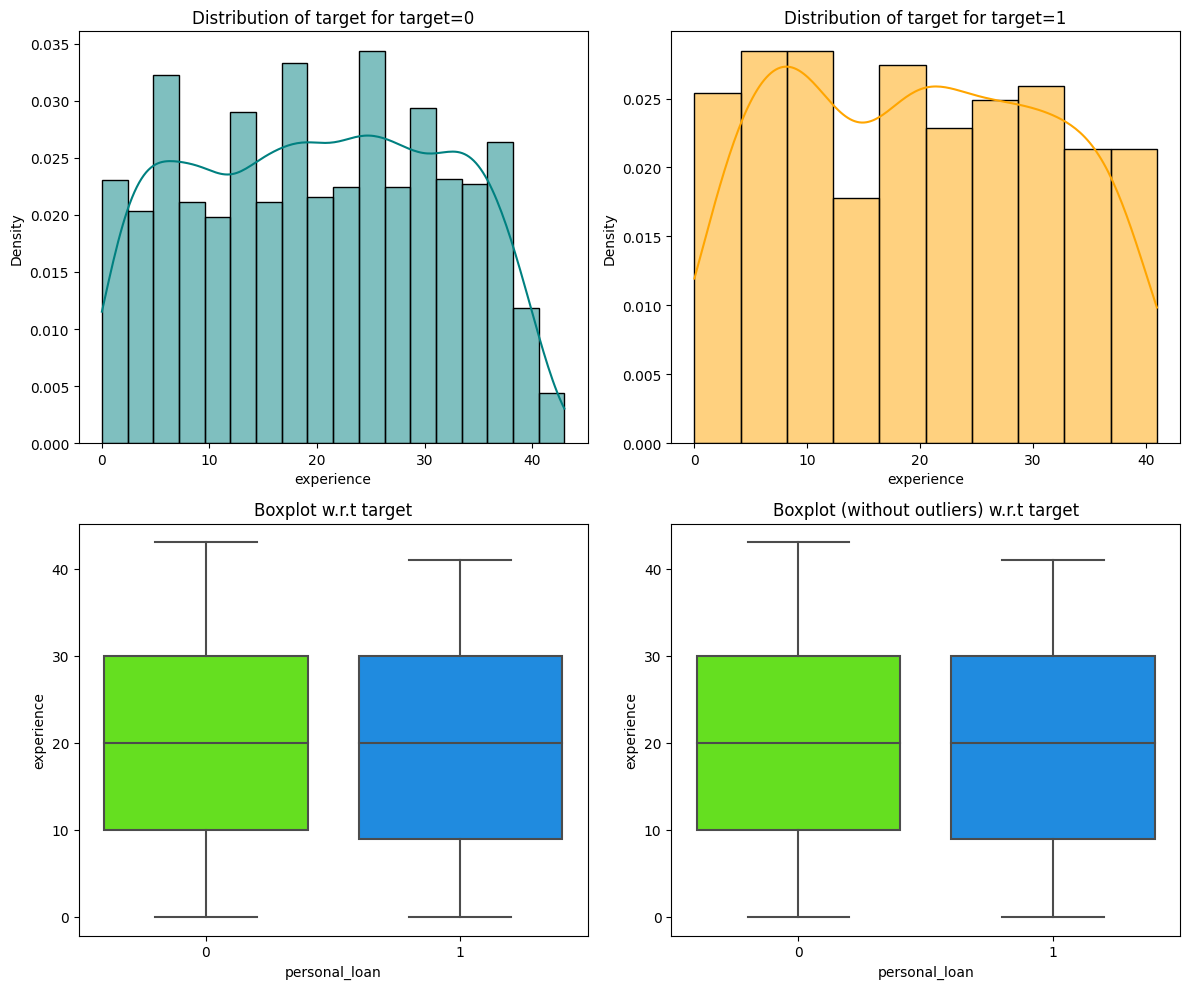

In [53]:
#Analyze the relationship between experience and personal loan
df.columns
distribution_plot_wrt_target(df,'experience', 'personal_loan')



In [54]:
import pandas as pd

# Create a sample DataFrame including 'id' and 'personal_loan' columns
data = {'ZIP Code': [90210, 10001, 75201],
        'id': [1, 2, 3],
        'personal_loan': [1, 0, 1]}

df = pd.DataFrame(data)

# Now you can drop the columns
X = df.drop(columns=['id', 'personal_loan'])
y = df['personal_loan']



In [55]:
#Defining a method to print the values counts in the plots
def print_value_counts(df, column):
    value_counts = df[column].value_counts()
    print(value_counts)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    return value_counts
    print(value_counts)



In [56]:
#defining a method to print the percentage of data points in the plot
def print_percentage(df, column):
    value_counts = df[column].value_counts(normalize=True)
    print(value_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)


In [57]:
#setting the color palette for the plots
sns.set_palette("nipy_spectral")

In [58]:
import pandas as pd
X=pd.get_dummies(X, columns=X.filter(items=["age", "experience", "income", "cc_avg", "zipcode", "family", "mortgage", "education"]).columns.tolist(), drop_first=True)
X.head()



,ZIP Code
0,90210
1,10001
2,75201


In [59]:
# label encoding the response variable
y = y.map({'Yes': 1, 'No': 0})

y.head()

0   NaN
1   NaN
2   NaN
Name: personal_loan, dtype: float64

In [60]:
#specifying the datatype of the independent variables data frame
X = X.astype(float)
X.head()

,ZIP Code
0,90210.0
1,10001.0
2,75201.0


In [61]:
# defining the figure size
plt.figure(figsize=(15, 10))



<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [62]:
#defining the list of numerical features to plot
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [63]:
#defining a method to plot histogram and boxplot combined in a single plot
def plot_histogram_boxplot(df, column):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
    print(df[column].describe())
    print(df[column].value_counts())
    print(df[column].unique())
    print(df[column].isnull().sum())
    print(df[column].isna().sum())
    print(df[column].nunique())
    print(df[column].corr(df['personal_loan']))
    print(df[column].corr(df['age']))
    print(df[column].corr(df['experience']))
    print(df[column].corr(df['income']))
    print(df[column].corr(df['cc_avg']))
    print(df[column].corr(df['mortgage']))
    print(df[column].corr(df['family']))
    print(df[column].corr(df['education']))
    print(df[column].corr(df['zipcode']))
    print(df[column].corr(df['securities_account']))
    print(df[column].corr(df['cd_account']))
    print(df[column].corr(df['credit_card']))
    print(df[column].corr(df['id']))

    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.20, 0.80)},
        figsize=figsize,
    )
    #creating the two subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    )
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    plt.show()
    return df[column].describe()


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#defining a method to plot histogram and boxplot combined in a single plot
def plot_histogram_boxplot(df, column):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
    print(df[column].describe())
    print(df[column].value_counts())
    print(df[column].unique())
    print(df[column].isnull().sum())
    print(df[column].isna().sum())
    print(df[column].nunique())
    # Assuming 'personal_loan', 'age', 'experience', etc. are also columns in your DataFrame
    # and they need to be converted to lowercase for consistency with the DataFrame column names


    # Fix: Convert column names to lowercase for correlation calculations
    print(df[column].corr(df['personal_loan'].str.lower() if df['personal_loan'].dtype == 'object' else df['personal_loan']))
    print(df[column].corr(df['age'].str.lower() if df['age'].dtype == 'object' else df['age']))
    print(df[column].corr(df['experience'].str.lower() if df['experience'].dtype == 'object' else df['experience']))
    print(df[column].corr(df['income'].str.lower() if df['income'].dtype == 'object' else df['income']))
    print(df[column].corr(df['cc_avg'].str.lower() if df['cc_avg'].dtype == 'object' else df['cc_avg']))
    print(df[column].corr(df['mortgage'].str.lower() if df['mortgage'].dtype == 'object' else df['mortgage']))
    print(df[column].corr(df['family'].str.lower() if df['family'].dtype == 'object' else df['family']))
    print(df[column].corr(df['education'].str.lower() if df['education'].dtype == 'object' else df['education']))
    print(df[column].corr(df['zipcode'].str.lower() if df['zipcode'].dtype == 'object' else df['zipcode']))
    print(df[column].corr(df['securities_account'].str.lower() if df['securities_account'].dtype == 'object' else df['securities_account']))
    print(df[column].corr(df['cd_account'].str.lower() if df['cd_account'].dtype == 'object' else df['cd_account']))
    print(df[column].corr(df['credit_card'].str.lower() if df['credit_card'].dtype == 'object' else df['credit_card']))
    print(df[column].corr(df['id'].str.lower() if df['id'].dtype == 'object' else df['id']))
    return df[column].describe()
    # Boxplot and histogram combined


In [66]:

def histogram_boxplot(data, feature, figsize=(9, 8), kde=False, bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.20, 0.80)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    )  # plotting the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()
    return data[feature].describe()  # returning the description of the feature

# 1. Age

ValueError: Could not interpret input 'Age'

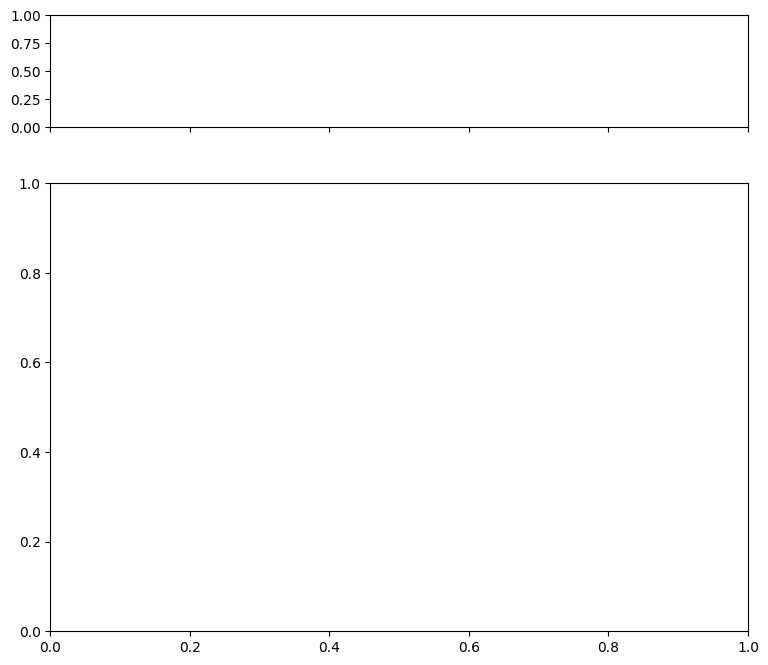

In [67]:
histogram_boxplot(df, 'Age')







1.   The histogram indicates a uniform distribution with 5 peak values.
2.   The boxplot indicates no outliers.
3.   Mean and median are very close to each other.


## **2. Experience**

ValueError: Could not interpret value `Experience` for `x`. An entry with this name does not appear in `data`.

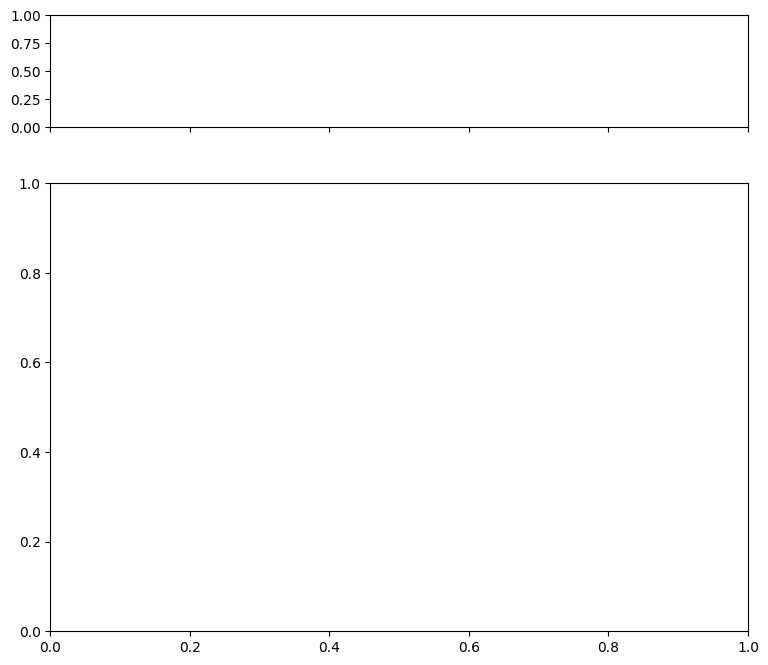

In [82]:
histogram_boxplot(df, 'Experience')

There is no outliers in the boxplot.
Found uniform distribution with 5 peak values in the histogram.

### 3. **Income**

ValueError: Could not interpret value `Income` for `x`. An entry with this name does not appear in `data`.

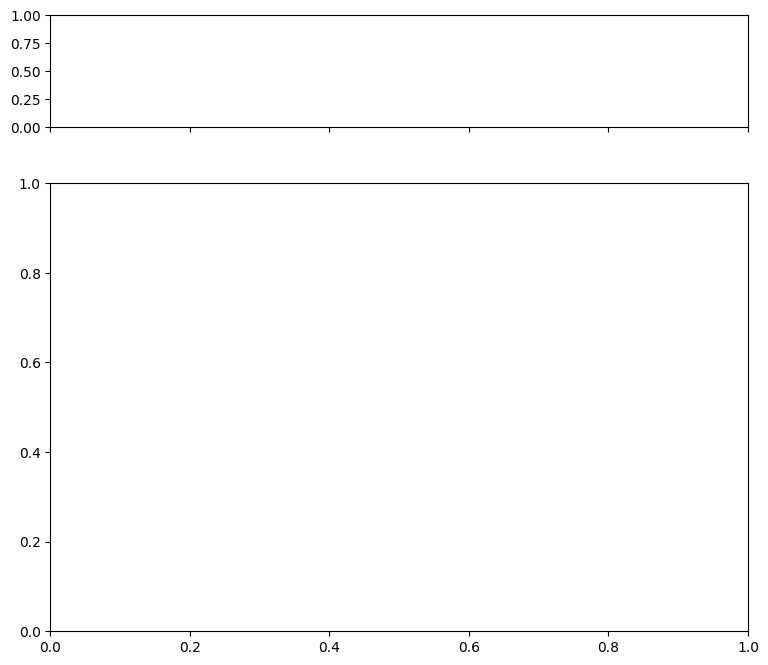

In [ ]:
histogram_boxplot(df, 'Income')



1.   The distribution is right skewed because the outliers spotted above the upper whisker in the boxplot.
2.   Income is decreased on histoplot.



### **4. Family**

In [ ]:
def percentage_on_bar(ax, data):
    """
    Calculate and display percentages on top of bars in a countplot.

    Args:
    ax (matplotlib.axes.Axes): The axes object containing the countplot.
    data (pandas.Series): The data used to create the countplot.
    """
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)  # Add percentage to the bar
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family')
plt.title('Distribution of family')
plt.xlabel('family')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['family'])
plt.show()

ValueError: Could not interpret value `family` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>



1.   Maximum number of customers are with a family size of 1.The next family sizes which have more percentage are 2 and 4
2.   The least family size in the graph is 3(20.2%)


### 5. Credit Card Average

In [ ]:
histogram_boxplot(df, 'CCAvg')

1.Right skewed data
2. Outliers are visible on above the upper whisker.

### 6. Education

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['Education'])
plt.show()

About 30 % of the data are Advanced/Professionals.
About 28% of the customers are Graduates.
Highest percentage of customers are under graduates.

### **7.Mortgage**

In [ ]:
histogram_boxplot(df, 'Mortgage')



1.  Highly skewed towards '0'
2.  Maximum number of customers do not have mortgage
3. Outliers spotted above the upper whisker
4. Most do further analysis to determine if 'Mortgage'can also be treated as category.



### **8.Personal Loan**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Personal_Loan')
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['Personal_Loan'])
plt.show()

1.It is found that around 90% of te customers did not accept the personal lian offered in the previous campaign.
2.There is only minimum amount of 9.6% of customers have accepted the personal loan.

### 9. Securities Account

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Securities_Account')
plt.title('Distribution of Securities Account')
plt.xlabel('Securities Account')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['Securities_Account'])
plt.show()

There is only 10.4 % of the customers hold a securities account wheres,majority of the customers don't have it.

### **Certificate of Deposit Account**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CD_Account')
plt.title('Distribution of CD Account')
plt.xlabel('CD Account')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['CD_Account'])
plt.show()

Only 6% of the customers hold a CD acount whereas 94% of the customers don't have CD account.

### **11.Online**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Online')
plt.title('Distribution of Online')
plt.xlabel('Online')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['Online'])
plt.show()

Observed 59.7% of the customers utilise internet banking facilities while 40.3% of them don't have it.

### **12.Credit Card**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CreditCard')
plt.title('Distribution of CreditCard')
plt.xlabel('CreditCard')
plt.ylabel('Count')
percentage_on_bar(plt.gca(), df['CreditCard'])
plt.show()



Only 29.4% of customers are using credit cards and 70.6% are not using the credit cards.

## **County**


In [ ]:
!pip install uszipcode
# library required to convert zipcode to county

from uszipcode import SearchEngine

# User defined function to do the same


def zipcode_to_county(zipc):
    search = SearchEngine()
    zipcode = search.by_zipcode(zipc)
    return zipcode.county

    return zipcode
    print(zipcode)
    print(zipcode.county)



In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='county')
plt.title('Distribution of county')
plt.xlabel('County')
plt.ylabel('County')
percentage_on_bar(plt.gca(), df['county'])
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
# Changed 'County' to 'county' to match the actual column name in the DataFrame.
sns.countplot(data=df, x='county')
plt.title('Distribution of County')
plt.xlabel('County')
plt.ylabel('County')
percentage_on_bar(plt.gca(), df['county'])
plt.show()

In [ ]:
plt.figure(figsize=(35, 10))
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Assuming 'X' is your DataFrame and 'county' is a column in it:
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

In [ ]:
# splitting the data in an 70:30 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)
print(X_train.shape[0]/X.shape[0])
print(X_test.shape[0]/X.shape[0])
print("percentage of y_train")
print(y_train.shape[0]/y.shape[0])
print("percentage of y_test")
print(y_test.shape[0]/y.shape[0])


In [ ]:
# plotting the histogram for each numerical feature
plt.figure(figsize=(15, 10))
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


for i, feature in enumerate(numerical_features):
    # Check if the feature exists in the DataFrame columns
    if feature in df.columns:
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.tight_layout()
    else:
        print(f"Warning: Feature '{feature}' not found in DataFrame.")



In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()

Observation: CCAvg,income, and Mortgage are right-skewed distribution.

In [ ]:
#checking the distribution of mortgage attribute
print(df['Mortgage'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()



*  The average distribution of mortgage attribute is ~56.5.





*  There are noticeable outliers in the distribution of mortgage attribute.


In [ ]:
#Checking the customers have credit cards
print(df['CreditCard'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditCard', data=df)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()



*   There are 3530 customers have  no credit cards.




In [ ]:
#Check the attributes that have a strong correlation with the target attribute (personal loan)
print(df.corr())
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**## Observation**:
The strongest correlation with the target attribute is between Income and CCAvg is 0.65.

In [ ]:
# checking customer's interest in purchasing a loan vary with their age
print(df['Age'].value_counts())
customers_interest_personal_loan = df[df['Personal_Loan'] == 1]
print(customers_interest_personal_loan['Age'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=customers_interest_personal_loan)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()



*   A customers with an age of 35 years old have more credit cards in the data.


*   A customers with an age of 34 years old have more interested to purchase personal loan.





In [ ]:
# Checking a customer's interest in purchasing a loan vary with their education
print(df['Education'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional


1.   There are people with an undergraduate degree has more credit cards(2096) than the people with graduate(1501) and advanced/professional degree(1403) based on the above data.




## Model Building

### Model Evaluation Criterion

*


### Model Building

In [77]:
# defining the independent variable
X = df.drop(columns=['ID', 'Personal_Loan'])

KeyError: "['ID', 'Personal_Loan'] not found in axis"

In [78]:
# creating an instance of the linear regression model
model0 = DecisionTreeClassifier(random_state=42)

In [79]:
# fitting the model to the training data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd # You likely already have this imported, but it's best to be explicit

#convert categorical data into numerical data
X=pd.get_dummies(X, columns=X.filter(items=["age", "experience", "income", "cc_avg", "zipcode", "family", "mortgage", "education"]).columns.tolist(), drop_first=True)
X.head()

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train[~y_train.isnull()] # Select rows in X_train where y_train is not null
y_train = y_train.dropna()

model0 = DecisionTreeClassifier(random_state=1)

## Model Performance Improvement

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf










In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
if (y == 1).any():  # Check if any value in y is equal to 1
    model0 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
else:
    model0 = DecisionTreeClassifier(random_state=1)
    X = df.drop(columns=['ID', 'Personal_Loan'])
    y = df['Personal_Loan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    X_train = X_train[~y_train.isnull()] # Select rows in X_train where y_train is not null
    y_train = y_train.dropna()
    model0 = DecisionTreeClassifier(random_state=1)
    model0.fit(X_train, y_train)
    model0

    #convert categorical data to numerical data in a dummy variable
    X=pd.get_dummies(X, columns=X.filter(items=["age", "experience", "income", "cc_avg", "zipcode", "family", "mortgage", "education"]).columns.tolist(), drop_first=True)
    X.head()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
print(confusion_matrix(y_train, model0.predict(X_train)))
print(confusion_matrix(y_test, model0.predict(X_test)))

The value of confusion matrix of Y-Train is 3169,0 and X-train is 0, 331. The confusion matrix value of y-test is 1338, 13 and X-test is 17,132

In [ ]:
decision_tree_classifier = model0
decision_tree_classifier

model0, X_train, y_train = decision_tree_classifier, X_train, y_train
decision_tree_perf_train = model_performance_classification(
    model0, X_train, y_train
)
decision_tree_perf_train

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    # Calculate percentages
    percentages = ["{0:.2%}".format(item/cm.sum()) for item in cm.flatten()]
    # Create labels array with same shape as cm
    labels = np.asarray(percentages).reshape(cm.shape)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    y_test = model0.predict(X_test)
print ('Y_test.shape')
print(y_test.shape)
print(y_test)

confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

In [ ]:

model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)
#calculate the pruning path
from sklearn.tree import _tree
cost_complexity_pruning_path = model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = cost_complexity_pruning_path.ccp_alphas, cost_complexity_pruning_path.impurities
ccp_alphas, impurities


In [ ]:
#convert numerical data to categorical data
X=pd.get_dummies(X, columns=X.filter(items=["age", "experience", "income", "cc_avg", "zipcode", "family", "mortgage", "education"]).columns.tolist(), drop_first=True)
confusion_matrix_sklearn(model1, X_train, y_train)
confusion_matrix_sklearn(model1, X_test, y_test)


In [ ]:
decision_tree_perf_train = model_performance_classification(
    model1, X_train, y_train
)
decision_tree_perf_train

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification(
    model1, X_test, y_test
)
decision_tree_perf_test

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            # Create a decision tree classifier with the current parameter values
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)



In [ ]:
# creating an instance of the best model
model2 = DecisionTreeClassifier(
    max_depth=max_depth,
    max_leaf_nodes=max_leaf_nodes,
    min_samples_split=min_samples_split,
    class_weight='balanced',
    random_state=42
)
model2 = best_estimator

# fitting the best model to the training data
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)
model2  # printing the best model



In [ ]:
decision_tree_tune_perf_test = model_performance_classification(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

In [ ]:
decision_tree_tune_perf_train = model_performance_classification(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

In [ ]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

## Model Performance Comparison and Final Model Selection

In [80]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

NameError: name 'model2' is not defined

In [81]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

NameError: name 'model2' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

In [ ]:
importances = model2.feature_importances_
importances

In [ ]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
from operator import index
# creating the model where we get highest train and test recall
model2 = DecisionTreeClassifier(
    max_depth=max_depth,
    max_leaf_nodes=max_leaf_nodes,
    min_samples_split=min_samples_split,
    class_weight='balanced',
    random_state=42
    )
model2 = best_estimator

# fitting the best model to the training data
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)
model2
best_model = np.argmax(recall_test)
best_model = model2
print(best_model)

In [ ]:
# training performance comparison
decision_tree_perf_train = model_performance_classification(
    model2, X_train, y_train
)
decision_tree_tune_perf_train = model_performance_classification(
    model2, X_train, y_train
)
plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

In [ ]:
# testing performance comparison
!pip install pandas
!pip install numpy
!pip install scikit-learn

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Assuming model2, X_test, and y_test are defined
decision_tree_perf_test = model_performance_classification(model2, X_test, y_test) # Call the function with appropriate arguments and assign
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_classifier_perf_test,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison : ")
models_test_comp_df


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

I believe that the liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more

___